<a href="https://colab.research.google.com/github/SelenaNahra/DL/blob/main/4106Homework1Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import os
from google.colab import drive

# Create 'temp' directory if it doesn't exist
os.makedirs('temp', exist_ok=True)

# Mount Google Drive
drive.mount('/content/drive')

# Load the train dataset
file_path = '/content/drive/My Drive/house-train.csv'
df_train = pd.read_csv(file_path)

# Display the first few rows of the dataset
#print(df_train.head())

# Features used for modeling
useful_cols = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF',
               'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces',
               'LotFrontage', 'WoodDeckSF', 'OpenPorchSF',
               'ExterQual', 'Neighborhood', 'MSZoning',
               'Alley', 'LotShape', 'LandContour', 'Condition1', 'HouseStyle', 'MasVnrType', 'SaleCondition', 'SalePrice']

df_train_prepro = df_train[useful_cols].copy()

# Remove Nulls
df_train_prepro['GarageArea'] = df_train_prepro['GarageArea'].fillna(df_train_prepro['GarageArea'].mean())
df_train_prepro['TotalBsmtSF'] = df_train_prepro['TotalBsmtSF'].fillna(df_train_prepro['TotalBsmtSF'].mean())

# Convert all columns to numeric (float) and handle NaN values
df_train_prepro = df_train_prepro.apply(pd.to_numeric, errors='coerce').fillna(0)
print(df_train_prepro.head())

# Save the DataFrame to a CSV file
output_file = 'temp/housing_df_train_prepro.csv'
df_train_prepro.to_csv(output_file, index=False)
print(f'DataFrame saved to {output_file}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   OverallQual  GrLivArea  GarageArea  TotalBsmtSF  FullBath  YearBuilt  \
0            7       1710         548          856         2       2003   
1            6       1262         460         1262         2       1976   
2            7       1786         608          920         2       2001   
3            7       1717         642          756         1       1915   
4            8       2198         836         1145         2       2000   

   YearRemodAdd  Fireplaces  LotFrontage  WoodDeckSF  ...  Neighborhood  \
0          2003           0         65.0           0  ...           0.0   
1          1976           1         80.0         298  ...           0.0   
2          2002           1         68.0           0  ...           0.0   
3          1970           1         60.0           0  ...           0.0   
4          2000           1         84.0     

Housing Regression


Epoch[1/20], Train Loss: 41038280619.8356, Validation Loss: 35526120181.4795, Validation RMSE: 188483.7398
Epoch[2/20], Train Loss: 32747859715.5069, Validation Loss: 31634516893.8082, Validation RMSE: 177860.9482
Epoch[3/20], Train Loss: 29063110768.2192, Validation Loss: 28284761298.4110, Validation RMSE: 168180.7400
Epoch[4/20], Train Loss: 25884525862.5753, Validation Loss: 25393110759.4521, Validation RMSE: 159352.1596
Epoch[5/20], Train Loss: 23137473437.8082, Validation Loss: 22900276153.8630, Validation RMSE: 151328.3719
Epoch[6/20], Train Loss: 20767852235.3973, Validation Loss: 20758437186.6301, Validation RMSE: 144077.8858
Epoch[7/20], Train Loss: 18727779173.6986, Validation Loss: 18913267852.2740, Validation RMSE: 137525.5171
Epoch[8/20], Train Loss: 16966701645.1507, Validation Loss: 17325139392.8767, Validation RMSE: 131624.9953
Epoch[9/20], Train Loss: 15448164562.4110, Validation Loss: 15963593265.0959, Validation RMSE: 126347.1142
Epoch[10/20], Train Loss: 14144197660

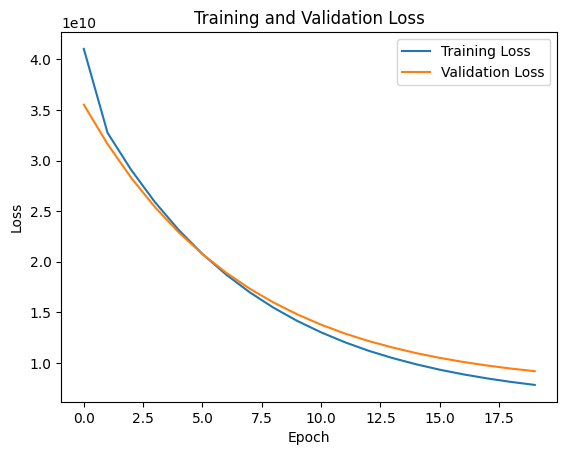

Final Validation RMSE: 95831.6357
Final Validation R-squared: -0.1973
Number of parameters in the model: 21041


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Load the preprocessed housing dataset
df_train_prepro = pd.read_csv('temp/housing_df_train_prepro.csv')

# Extract features and target variable
X = df_train_prepro.drop(['SalePrice'], axis=1).values
y = df_train_prepro['SalePrice'].values

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# Create TensorDatasets and DataLoaders for train and validation sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)

# Definition of network model class
class RegressionNet(nn.Module):
    def __init__(self):
        super(RegressionNet, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 500)
        self.fc2 = nn.Linear(500, 20)
        self.fc3 = nn.Linear(20, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the network
model = RegressionNet()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training loop
train_loss_list = []
val_loss_list = []

num_epochs = 20
for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Clear existing gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, targets.view(-1, 1))  # Compute loss
        loss.backward()  # Backward pass (compute gradients)
        optimizer.step()  # Update model parameters
        train_loss += loss.item() * inputs.size(0)  # Accumulate the loss

    # Calculate average training loss
    train_loss /= len(train_loader.dataset)
    train_loss_list.append(train_loss)

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_total = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, targets.view(-1, 1))  # Compute loss
            val_loss += loss.item() * inputs.size(0)  # Accumulate the loss
            val_total += ((outputs - targets.view(-1, 1)) ** 2).sum().item()  # Accumulate squared errors

    # Calculate average validation loss (MSE) and RMSE
    val_loss /= len(val_loader.dataset)
    val_loss_list.append(val_loss)
    rmse = np.sqrt(val_total / len(val_loader.dataset))

    # Print training and validation results
    print(f'Epoch[{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation RMSE: {rmse:.4f}')

# Plotting training and validation loss
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('temp/regression_loss_plot.png')
plt.show()

# Print final RMSE
print(f'Final Validation RMSE: {rmse:.4f}')

# Calculate R-squared for final validation predictions
model.eval()
with torch.no_grad():
    final_val_predictions = model(X_val_tensor)
r_squared = 1 - (val_loss / np.var(y_val))
print(f'Final Validation R-squared: {r_squared:.4f}')

# Display the number of parameters in the model
num_params = sum(p.numel() for p in model.parameters())
print(f'Number of parameters in the model: {num_params}')

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import os
from google.colab import drive

# Create 'temp' directory if it doesn't exist
os.makedirs('temp', exist_ok=True)

# Mount Google Drive
drive.mount('/content/drive')

# Load the train dataset
file_path = '/content/drive/My Drive/house-train.csv'
df_train = pd.read_csv(file_path)

# Display the first few rows of the test dataset
#df_train.head()

# Features used for modeling
useful_cols = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF',
               'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces',
               'LotFrontage', 'WoodDeckSF', 'OpenPorchSF',
               'ExterQual', 'Neighborhood', 'MSZoning',
               'Alley', 'LotShape', 'LandContour', 'Condition1', 'HouseStyle', 'MasVnrType', 'SaleCondition', 'SalePrice']

df_train_encode = df_train[useful_cols].copy()

# Remove Nulls
df_train_encode['GarageArea'] = df_train_encode['GarageArea'].fillna(df_train_encode['GarageArea'].mean())
df_train_encode['TotalBsmtSF'] = df_train_encode['TotalBsmtSF'].fillna(df_train_encode['TotalBsmtSF'].mean())

# One-hot encoding
df_train_encode = pd.get_dummies(df_train_encode,
                                 columns=['Neighborhood', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'Condition1',
                                          'HouseStyle', 'MasVnrType', 'SaleCondition'])

# Replace boolean values with 1 and 0
df_train_encode = df_train_encode.replace({True: 1, False: 0})

# Convert all columns to numeric (float) and handle NaN values
df_train_encode = df_train_encode.apply(pd.to_numeric, errors='coerce').fillna(0)
print(df_train_encode.head())

# Save the DataFrame to a CSV file
output_file = 'temp/housing_df_train_encode.csv'
df_train_encode.to_csv(output_file, index=False)
print(f'DataFrame saved to {output_file}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   OverallQual  GrLivArea  GarageArea  TotalBsmtSF  FullBath  YearBuilt  \
0            7       1710         548          856         2       2003   
1            6       1262         460         1262         2       1976   
2            7       1786         608          920         2       2001   
3            7       1717         642          756         1       1915   
4            8       2198         836         1145         2       2000   

   YearRemodAdd  Fireplaces  LotFrontage  WoodDeckSF  ...  MasVnrType_BrkCmn  \
0          2003           0         65.0           0  ...                  0   
1          1976           1         80.0         298  ...                  0   
2          2002           1         68.0           0  ...                  0   
3          1970           1         60.0           0  ...                  0   
4          2000     

Housing Regression On-Hot Ecnoding

Epoch[1/20], Train Loss: 40219075485.8082, Validation Loss: 35528840514.6301, Validation RMSE: 188490.9561
Epoch[2/20], Train Loss: 32751089972.6027, Validation Loss: 31633525072.6575, Validation RMSE: 177858.1600
Epoch[3/20], Train Loss: 29061193419.3973, Validation Loss: 28289415785.2055, Validation RMSE: 168194.5772
Epoch[4/20], Train Loss: 25889913393.0959, Validation Loss: 25406422619.1781, Validation RMSE: 159393.9228
Epoch[5/20], Train Loss: 23150796771.9452, Validation Loss: 22916788111.7808, Validation RMSE: 151382.9188
Epoch[6/20], Train Loss: 20783426447.7808, Validation Loss: 20776794252.2740, Validation RMSE: 144141.5771
Epoch[7/20], Train Loss: 18745057532.4931, Validation Loss: 18935886974.2466, Validation RMSE: 137607.7286
Epoch[8/20], Train Loss: 16988675443.7260, Validation Loss: 17354429468.0548, Validation RMSE: 131736.2117
Epoch[9/20], Train Loss: 15476301515.3973, Validation Loss: 15982101630.2466, Validation RMSE: 126420.3371
Epoch[10/20], Train Loss: 14161530164

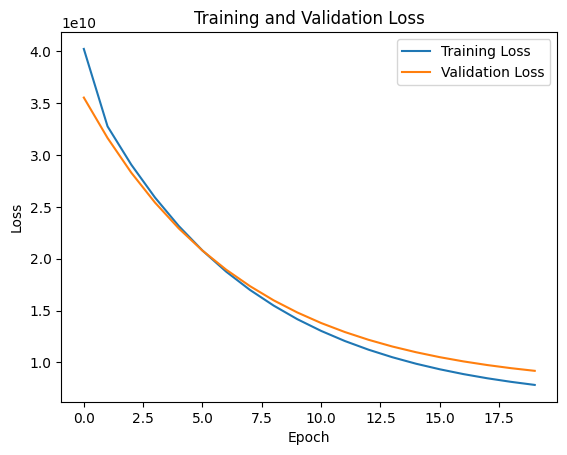

Final Validation RMSE: 95854.1216
Final Validation R-squared: -0.1979
Number of parameters in the model: 50041


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Load the encoded housing dataset
df_train_encode = pd.read_csv('temp/housing_df_train_encode.csv')

# Extract features and target variable
X = df_train_encode.drop(['SalePrice'], axis=1).values
y = df_train_encode['SalePrice'].values

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# Create TensorDatasets and DataLoaders for train and validation sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)

# Definition of network model class
class RegressionNet(nn.Module):
    def __init__(self):
        super(RegressionNet, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 500)
        self.fc2 = nn.Linear(500, 20)
        self.fc3 = nn.Linear(20, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the network
model = RegressionNet()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training loop
train_loss_list = []
val_loss_list = []

num_epochs = 20
for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Clear existing gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, targets.view(-1, 1))  # Compute loss
        loss.backward()  # Backward pass (compute gradients)
        optimizer.step()  # Update model parameters
        train_loss += loss.item() * inputs.size(0)  # Accumulate the loss

    # Calculate average training loss
    train_loss /= len(train_loader.dataset)
    train_loss_list.append(train_loss)

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_total = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, targets.view(-1, 1))  # Compute loss
            val_loss += loss.item() * inputs.size(0)  # Accumulate the loss
            val_total += ((outputs - targets.view(-1, 1)) ** 2).sum().item()  # Accumulate squared errors

    # Calculate average validation loss (MSE) and RMSE
    val_loss /= len(val_loader.dataset)
    val_loss_list.append(val_loss)
    rmse = np.sqrt(val_total / len(val_loader.dataset))

    # Print training and validation results
    print(f'Epoch[{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation RMSE: {rmse:.4f}')

# Plotting training and validation loss
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('temp/regression_loss_plot.png')
plt.show()

# Print final RMSE
print(f'Final Validation RMSE: {rmse:.4f}')

# Calculate R-squared for final validation predictions
model.eval()
with torch.no_grad():
    final_val_predictions = model(X_val_tensor)
r_squared = 1 - (val_loss / np.var(y_val))
print(f'Final Validation R-squared: {r_squared:.4f}')

# Display the number of parameters in the model
num_params = sum(p.numel() for p in model.parameters())
print(f'Number of parameters in the model: {num_params}')

Housing Regression On-Hot Encoding (Decreased Width)


Epoch[1/20], Train Loss: 2024201045763.5068, Validation Loss: 40135593422.9041, Validation RMSE: 200338.6968
Epoch[2/20], Train Loss: 37110276629.0411, Validation Loss: 35611827578.7397, Validation RMSE: 188710.9631
Epoch[3/20], Train Loss: 32829118884.8219, Validation Loss: 31709161752.5479, Validation RMSE: 178070.6651
Epoch[4/20], Train Loss: 29131797658.3014, Validation Loss: 28350927633.5342, Validation RMSE: 168377.3371
Epoch[5/20], Train Loss: 25947035283.2877, Validation Loss: 25451085150.6849, Validation RMSE: 159533.9624
Epoch[6/20], Train Loss: 23193817354.5205, Validation Loss: 22963419612.9315, Validation RMSE: 151536.8589
Epoch[7/20], Train Loss: 20828051147.3973, Validation Loss: 20810408974.0274, Validation RMSE: 144258.1331
Epoch[8/20], Train Loss: 18776544213.9178, Validation Loss: 18949272926.6849, Validation RMSE: 137656.3581
Epoch[9/20], Train Loss: 17001307472.6575, Validation Loss: 17365743307.3973, Validation RMSE: 131779.1460
Epoch[10/20], Train Loss: 154864809

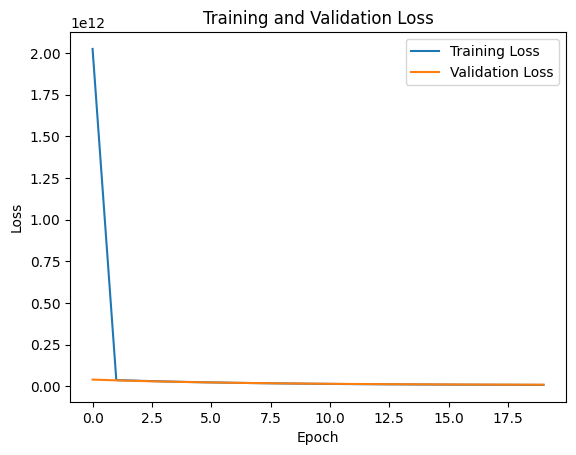

Final Validation RMSE: 97126.8525
Final Validation R-squared: -0.2299
Number of parameters in the model: 36201


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Load the encoded housing dataset
df_train_encode = pd.read_csv('temp/housing_df_train_encode.csv')

# Extract features and target variable
X = df_train_encode.drop(['SalePrice'], axis=1).values
y = df_train_encode['SalePrice'].values

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# Create TensorDatasets and DataLoaders for train and validation sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)

# Definition of network model class
class RegressionNet(nn.Module):
    def __init__(self):
        super(RegressionNet, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 200)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the network
model = RegressionNet()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training loop
train_loss_list = []
val_loss_list = []

num_epochs = 20
for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Clear existing gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, targets.view(-1, 1))  # Compute loss
        loss.backward()  # Backward pass (compute gradients)
        optimizer.step()  # Update model parameters
        train_loss += loss.item() * inputs.size(0)  # Accumulate the loss

    # Calculate average training loss
    train_loss /= len(train_loader.dataset)
    train_loss_list.append(train_loss)

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_total = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, targets.view(-1, 1))  # Compute loss
            val_loss += loss.item() * inputs.size(0)  # Accumulate the loss
            val_total += ((outputs - targets.view(-1, 1)) ** 2).sum().item()  # Accumulate squared errors

    # Calculate average validation loss (MSE) and RMSE
    val_loss /= len(val_loader.dataset)
    val_loss_list.append(val_loss)
    rmse = np.sqrt(val_total / len(val_loader.dataset))

    # Print training and validation results
    print(f'Epoch[{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation RMSE: {rmse:.4f}')

# Plotting training and validation loss
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('temp/regression_loss_plot.png')
plt.show()

# Print final RMSE
print(f'Final Validation RMSE: {rmse:.4f}')

# Calculate R-squared for final validation predictions
model.eval()
with torch.no_grad():
    final_val_predictions = model(X_val_tensor)
r_squared = 1 - (val_loss / np.var(y_val))
print(f'Final Validation R-squared: {r_squared:.4f}')

# Display the number of parameters in the model
num_params = sum(p.numel() for p in model.parameters())
print(f'Number of parameters in the model: {num_params}')

Housing Regression One-Hot Encoding (Increased Depth)

Epoch[1/20], Train Loss: inf, Validation Loss: inf, Validation RMSE: inf
Epoch[2/20], Train Loss: inf, Validation Loss: inf, Validation RMSE: inf
Epoch[3/20], Train Loss: inf, Validation Loss: inf, Validation RMSE: inf
Epoch[4/20], Train Loss: inf, Validation Loss: 10514253457238099359048980700747268096.0000, Validation RMSE: 3242568959519303680.0000
Epoch[5/20], Train Loss: 9801512600720752155410877106318475264.0000, Validation Loss: 9066474134812001065364854388092305408.0000, Validation RMSE: 3011058640214767104.0000
Epoch[6/20], Train Loss: 8451877896113054720708980838376669184.0000, Validation Loss: 7818048098444071169894196255433687040.0000, Validation RMSE: 2796077269755624960.0000
Epoch[7/20], Train Loss: 7288080778181355189895768798010540032.0000, Validation Loss: 6741528151290553170522859224199856128.0000, Validation RMSE: 2596445291411038720.0000
Epoch[8/20], Train Loss: 6284536584797703524983032911574859776.0000, Validation Loss: 5813244730026523860903743672396283904.0000, V

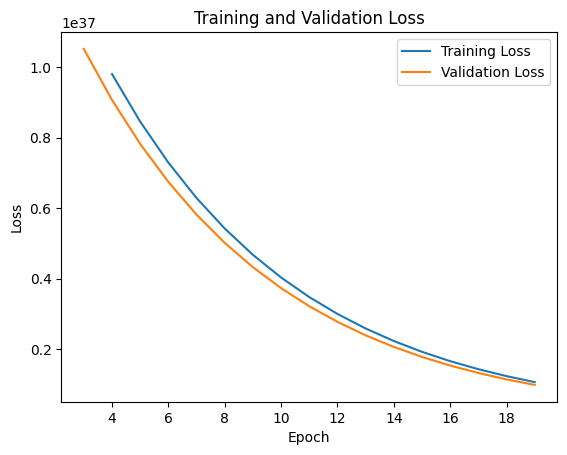

Final Validation RMSE: 991218557171208832.0000
Final Validation R-squared: -128092886996116707517399040.0000
Number of parameters in the model: 92141


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Load the encoded housing dataset
df_train_encode = pd.read_csv('temp/housing_df_train_encode.csv')

# Extract features and target variable
X = df_train_encode.drop(['SalePrice'], axis=1).values
y = df_train_encode['SalePrice'].values

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# Create TensorDatasets and DataLoaders for train and validation sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)

# Definition of network model class
class RegressionNet(nn.Module):
    def __init__(self):
        super(RegressionNet, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 500)
        self.fc2 = nn.Linear(500, 100)
        self.fc3 = nn.Linear(100, 20)
        self.fc4 = nn.Linear(20, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the network
model = RegressionNet()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training loop
train_loss_list = []
val_loss_list = []

num_epochs = 20
for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Clear existing gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, targets.view(-1, 1))  # Compute loss
        loss.backward()  # Backward pass (compute gradients)
        optimizer.step()  # Update model parameters
        train_loss += loss.item() * inputs.size(0)  # Accumulate the loss

    # Calculate average training loss
    train_loss /= len(train_loader.dataset)
    train_loss_list.append(train_loss)

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_total = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, targets.view(-1, 1))  # Compute loss
            val_loss += loss.item() * inputs.size(0)  # Accumulate the loss
            val_total += ((outputs - targets.view(-1, 1)) ** 2).sum().item()  # Accumulate squared errors

    # Calculate average validation loss (MSE) and RMSE
    val_loss /= len(val_loader.dataset)
    val_loss_list.append(val_loss)
    rmse = np.sqrt(val_total / len(val_loader.dataset))

    # Print training and validation results
    print(f'Epoch[{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation RMSE: {rmse:.4f}')

# Plotting training and validation loss
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('temp/regression_loss_plot.png')
plt.show()

# Print final RMSE
print(f'Final Validation RMSE: {rmse:.4f}')

# Calculate R-squared for final validation predictions
model.eval()
with torch.no_grad():
    final_val_predictions = model(X_val_tensor)
r_squared = 1 - (val_loss / np.var(y_val))
print(f'Final Validation R-squared: {r_squared:.4f}')

# Display the number of parameters in the model
num_params = sum(p.numel() for p in model.parameters())
print(f'Number of parameters in the model: {num_params}')